In [ ]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 4.5MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219251 sha256=23e024e02fea41574af3aa303dcff657dfa921c0e289f6d812c9e20ab8859abe
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ..."
1,"[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ..."
2,"[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ..."
3,"[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ..."
4,"[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ..."
...,...
6265,"[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ..."
6266,"[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ..."
6267,"[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ..."
6268,"[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ..."


Median length of Joined sequence is 877


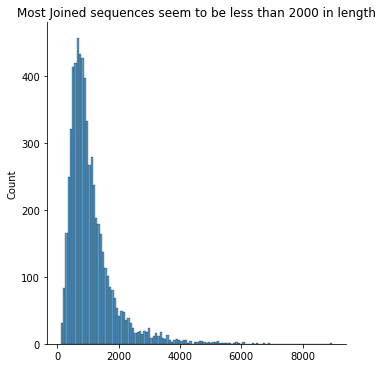

In [ ]:
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 10000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 8962
min sequence_data length: 103
median sequence_data length: 877


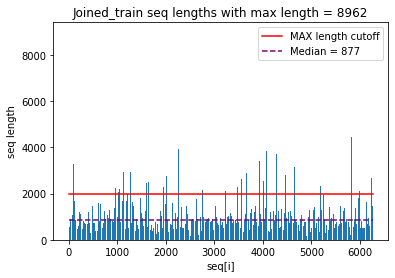

max word index: 8000
Found 8000 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 6122
min sequences_test length: 130
median sequences_test length: 897


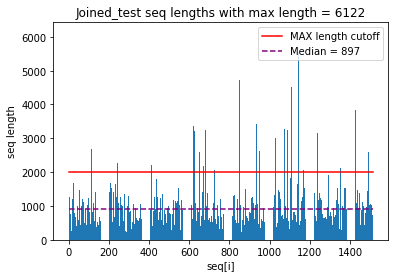

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 8001


In [ ]:
data_3D_join,data_test_3D_join,num_words_3D,MAX_SEQUENCE_LENGTH_3D,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(10000,2000,df_train,df_test, pad = 'pre', show=True)

In [ ]:
EMBEDDING_DIM_3D = 10
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 20
M_3D=30

embedding_matrix_3D = random.uniform(-1, 1,(num_words_3D,EMBEDDING_DIM_3D))
embedding_layer_3D_join = Embedding(
  num_words_3D,
  EMBEDDING_DIM_3D,
  weights=[embedding_matrix_3D],
  input_length=MAX_SEQUENCE_LENGTH_3D,
  trainable=True
)
MAX_SEQUENCE_LENGTH_3D 

2000

In [ ]:

print('Building model...')

ip = Input(shape=(MAX_SEQUENCE_LENGTH_3D,),name = 'model3D_join_ip')
x = embedding_layer_3D_join(ip)
x = Bidirectional(LSTM(M_3D, return_sequences=True),name = 'model3D_join_Bidirectional')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = GlobalMaxPool1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation="sigmoid")(x)
model3D_join = Model(ip, output)

model3D_join.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


print('Training model...')
jk = model3D_join.fit(
  data_3D_join,
  df_train['label'].values,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  #validation_split=VALIDATION_SPLIT
)


Building model...
Training model...
Epoch 1/20
49/49 [==============================] - 26s 170ms/step - loss: 0.7053 - accuracy: 0.5172
Epoch 2/20
49/49 [==============================] - 9s 174ms/step - loss: 0.6795 - accuracy: 0.5749
Epoch 3/20
49/49 [==============================] - 9s 177ms/step - loss: 0.5296 - accuracy: 0.7430
Epoch 4/20
49/49 [==============================] - 9s 177ms/step - loss: 0.3607 - accuracy: 0.8592
Epoch 5/20
49/49 [==============================] - 9s 177ms/step - loss: 0.2655 - accuracy: 0.9072
Epoch 6/20
49/49 [==============================] - 9s 177ms/step - loss: 0.2075 - accuracy: 0.9278
Epoch 7/20
49/49 [==============================] - 9s 179ms/step - loss: 0.1928 - accuracy: 0.9358
Epoch 8/20
49/49 [==============================] - 9s 179ms/step - loss: 0.1592 - accuracy: 0.9438
Epoch 9/20
49/49 [==============================] - 9s 179ms/step - loss: 0.1619 - accuracy: 0.9389
Epoch 10/20
49/49 [==============================] - 9s 179ms/s

In [ ]:
yhat =  model3D_join.predict(data_test_3D_join)
y = df_test['label'].values
fpr, tpr, thresholds = roc_curve(y, yhat)
auc = auc(fpr, tpr)
auc

0.8203801071112592

In [ ]:
#model3D_join.save('/content/drive/MyDrive/ML_Data/model3D_join.h5')